In [98]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [99]:
def load_data():
    df = pd.read_csv("smartphone_activity_dataset.csv")
    return df

In [100]:
def load_description():
    attributes = pd.read_csv("attributes_smartphone_activity.csv")
    return attributes

In [101]:
df = load_data()

In [102]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Data columns (total 562 columns):
 #   Column       Dtype  
---  ------       -----  
 0   feature_1    float64
 1   feature_2    float64
 2   feature_3    float64
 3   feature_4    float64
 4   feature_5    float64
 5   feature_6    float64
 6   feature_7    float64
 7   feature_8    float64
 8   feature_9    float64
 9   feature_10   float64
 10  feature_11   float64
 11  feature_12   float64
 12  feature_13   float64
 13  feature_14   float64
 14  feature_15   float64
 15  feature_16   float64
 16  feature_17   float64
 17  feature_18   float64
 18  feature_19   float64
 19  feature_20   float64
 20  feature_21   float64
 21  feature_22   float64
 22  feature_23   float64
 23  feature_24   float64
 24  feature_25   float64
 25  feature_26   float64
 26  feature_27   float64
 27  feature_28   float64
 28  feature_29   float64
 29  feature_30   float64
 30  feature_31   float64
 31  feature_32   float64
 32  f

In [103]:
y = df["activity"]
X = df.drop(['activity'],axis=1)

In [104]:
def split_data(df):
    
    X_train, X_val, y_train, y_val = train_test_split(
        X, y, stratify=y, test_size=0.3, random_state=42
    )
    X_val, X_test, y_val, y_test = train_test_split(
        X_val, y_val, stratify=y_val, test_size=0.3, random_state=42
    )
    return X_train, X_val, X_test, y_train, y_val, y_test 

In [105]:
X_train, X_val, X_test, y_train, y_val, y_test = split_data(df)

In [106]:
print("X_train:",len(X_train))
print("y_train:",len(y_train))
print("X_val:",len(X_val))
print("y_val:",len(y_val))
print("X_test:",len(X_test))
print("y_test:",len(y_test))

X_train: 7209
y_train: 7209
X_val: 2163
y_val: 2163
X_test: 927
y_test: 927


In [107]:
def remove_correlated(df):
    corr = df.corr()

    # Create a mask for values above 90% 
    # But also below 100% since it variables correlated with the same one
    mask = (df.corr() > 0.9) & (df.corr() < 1.0)
    high_corr = corr[mask]

    # Create a new column mask using any() and ~
    col_to_filter_out = ~high_corr[mask].any()

    # Apply new mask
    df_clean = df[high_corr.columns[col_to_filter_out]]

    # Visualize cleaned dataset
    return df_clean

In [108]:
X_train = remove_correlated(X_train)

In [109]:
X_train.shape

(7209, 157)

In [110]:
X_train.columns

Index(['feature_1', 'feature_2', 'feature_3', 'feature_25', 'feature_27',
       'feature_28', 'feature_29', 'feature_31', 'feature_32', 'feature_33',
       ...
       'feature_546', 'feature_551', 'feature_552', 'feature_555',
       'feature_556', 'feature_557', 'feature_558', 'feature_559',
       'feature_560', 'feature_561'],
      dtype='object', length=157)

In [111]:
def check_what_influence(X,y):
    X_copy = X.copy()
    X_copy["activity"] = y
    corr_matrix = X_copy.corr().abs()
    corr_matrix = corr_matrix["activity"]
    return corr_matrix.nlargest(20).iloc[1:]

In [112]:
x = check_what_influence(X_train,y_train)
x

feature_135    0.754276
feature_205    0.744780
feature_218    0.744780
feature_173    0.725228
feature_231    0.719372
feature_25     0.714130
feature_257    0.708729
feature_134    0.699811
feature_175    0.681919
feature_155    0.669971
feature_133    0.667809
feature_244    0.644104
feature_174    0.633811
feature_559    0.613722
feature_145    0.609453
feature_560    0.603760
feature_520    0.600263
feature_546    0.574467
feature_375    0.564158
Name: activity, dtype: float64

In [113]:
featuresA = [str(col) for col in x.index]
featuresA

['feature_135',
 'feature_205',
 'feature_218',
 'feature_173',
 'feature_231',
 'feature_25',
 'feature_257',
 'feature_134',
 'feature_175',
 'feature_155',
 'feature_133',
 'feature_244',
 'feature_174',
 'feature_559',
 'feature_145',
 'feature_560',
 'feature_520',
 'feature_546',
 'feature_375']

In [114]:
def choose_the_best(df,features):
    df = df[features]
    return df

In [115]:
X_train = choose_the_best(X_train,featuresA)

In [116]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7209 entries, 4111 to 8906
Data columns (total 19 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   feature_135  7209 non-null   float64
 1   feature_205  7209 non-null   float64
 2   feature_218  7209 non-null   float64
 3   feature_173  7209 non-null   float64
 4   feature_231  7209 non-null   float64
 5   feature_25   7209 non-null   float64
 6   feature_257  7209 non-null   float64
 7   feature_134  7209 non-null   float64
 8   feature_175  7209 non-null   float64
 9   feature_155  7209 non-null   float64
 10  feature_133  7209 non-null   float64
 11  feature_244  7209 non-null   float64
 12  feature_174  7209 non-null   float64
 13  feature_559  7209 non-null   float64
 14  feature_145  7209 non-null   float64
 15  feature_560  7209 non-null   float64
 16  feature_520  7209 non-null   float64
 17  feature_546  7209 non-null   float64
 18  feature_375  7209 non-null   float64
dtypes: 

In [117]:
def preprocess_data(X,y):
    X = remove_correlated(X)
    features = check_what_influence(X,y)
    features_list = [str(col) for col in x.index]
    X = choose_the_best(X,features_list)
    X = X.drop(['feature_218', "feature_174"], axis=1)
    return X,y

In [118]:
X_train.describe()

,feature_135,feature_205,feature_218,feature_173,feature_231,feature_25,feature_257,feature_134,feature_175,feature_155,feature_133,feature_244,feature_174,feature_559,feature_145,feature_560,feature_520,feature_546,feature_375
count,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000,7209.000000
mean,0.559761,-0.837808,-0.837808,0.759880,-0.787868,-0.160163,-0.803318,0.734733,0.799265,0.066553,0.631928,-0.729615,0.830472,-0.496144,-0.062471,0.062519,-0.803494,-0.872968,-0.125067
std,0.307539,0.189591,0.189591,0.280288,0.254957,0.368262,0.246835,0.211230,0.248100,0.282703,0.251907,0.312646,0.227461,0.510274,0.458443,0.308299,0.269534,0.184830,0.274025
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.322000,-0.993000,-0.993000,0.567000,-0.983000,-0.500000,-0.990000,0.605000,0.644000,-0.168000,0.462000,-0.989000,0.722000,-0.816000,-0.468000,-0.001330,-0.987000,-0.994000,-0.331000
50%,0.744000,-0.967000,-0.967000,0.931000,-0.963000,-0.137000,-0.971000,0.853000,0.956000,0.062700,0.772000,-0.881000,0.958000,-0.713000,0.030800,0.182000,-0.960000,-0.973000,-0.102000
75%,0.823000,-0.694000,-0.694000,0.991000,-0.610000,0.168000,-0.640000,0.906000,0.994000,0.288000,0.838000,-0.525000,0.994000,-0.522000,0.310000,0.251000,-0.679000,-0.807000,0.090900
max,1.000000,0.720000,0.720000,1.000000,1.000000,1.000000,0.804000,1.000000,1.000000,0.945000,1.000000,1.000000,1.000000,0.977000,1.000000,1.000000,1.000000,0.604000,1.000000


In [119]:
print(len(X_train))
print(len(y_train))

7209
7209


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023D9E827670>,
      dtype=object)

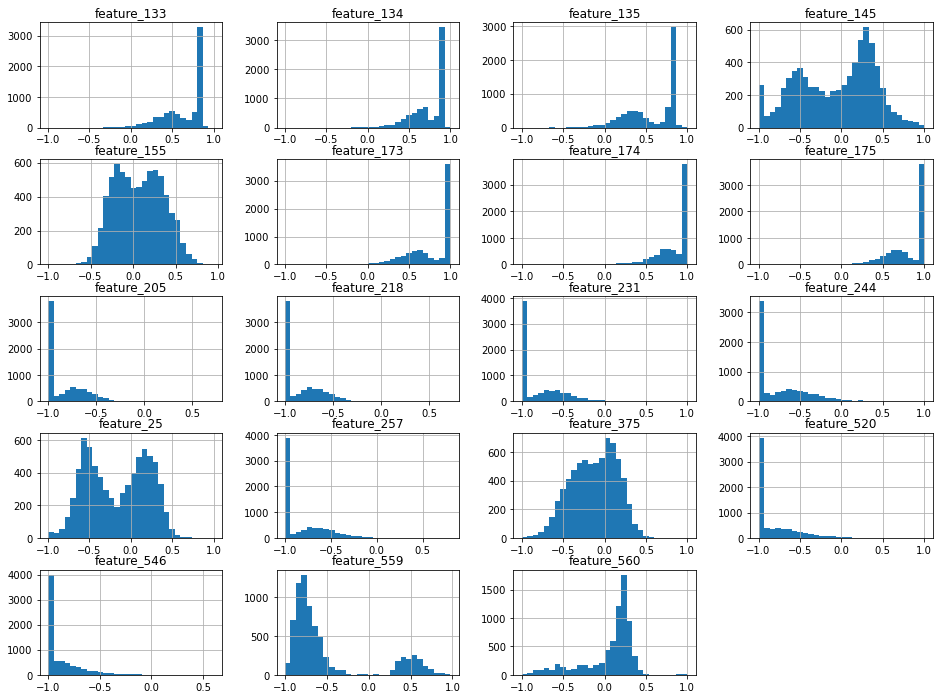

In [120]:
X_train.hist(bins=30, figsize=(16, 12))

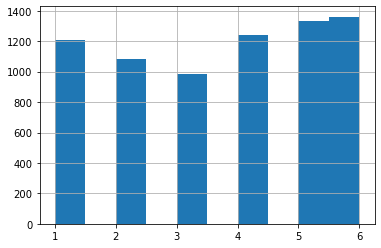

In [121]:
y_train.hist()

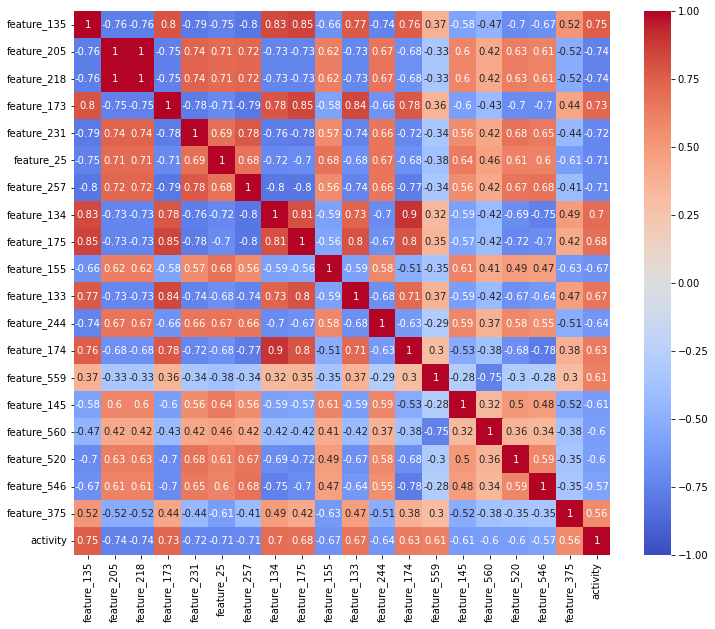

In [122]:
#corr map on shorter dataset
df = X_train.copy()
df["activity"] = y_train
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot = True)

In [123]:
#we can delete feature_205 or feature_218 and feature_174 or feature_134 cuz they are highly correlated
X_train = X_train.drop(['feature_218', "feature_174"], axis=1)

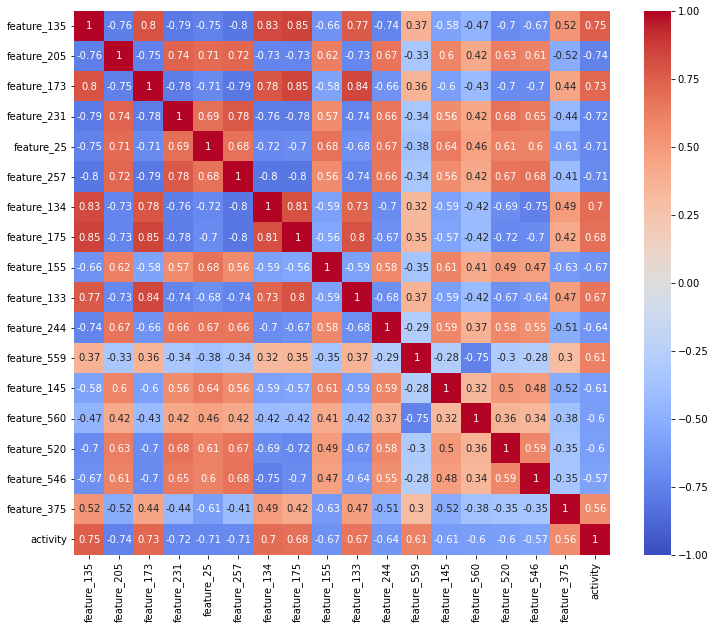

In [124]:
df = X_train.copy()
df["activity"] = y_train
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), vmin=-1, vmax=1, cmap='coolwarm', annot = True)

In [125]:
#Zastanawiam sie ktore wartosci moge jeszcze wyrzucic, z jednej strony wybierajac najbardziej skorelowane z predykatorem narazam 
#sie na przypadek wyboru cech ktore sa ze soba dosc mocno skorelowane wiec bezposrednio nie wniosa tyle informacji co cechy 
#ktore bylyby ze soba mniej skorelowane, z drugiej strony wybierajac te ktore nie sa ze soba mocno skorelowane moze byc przypadek 
#ze wybiore zmienne ktore koniec koncow maja mniejsza korelacje z predykatem niz te ktore wyrzucilem masz jakis pomysl?

In [126]:
(df[df.columns] == 0).sum(axis = 0)

feature_135    0
feature_205    0
feature_173    0
feature_231    0
feature_25     0
feature_257    0
feature_134    0
feature_175    0
feature_155    0
feature_133    0
feature_244    0
feature_559    0
feature_145    0
feature_560    0
feature_520    0
feature_546    0
feature_375    0
activity       0
dtype: int64

In [127]:
df.nunique() / len(df) * 100

feature_135    16.326814
feature_205     9.377167
feature_173    12.720211
feature_231    12.581495
feature_25     26.355944
feature_257    11.998890
feature_134    10.805937
feature_175    11.499514
feature_155    28.617007
feature_133    12.942156
feature_244    15.785823
feature_559    15.882924
feature_145    27.451796
feature_560    22.846442
feature_520    14.079623
feature_546    10.375919
feature_375    31.793591
activity        0.083229
dtype: float64

In [128]:
y_train

4111    1
8040    6
7234    6
833     2
2552    5
       ..
316     2
5920    4
1451    2
1307    2
8906    4
Name: activity, Length: 7209, dtype: int64

In [129]:
X_train

,feature_135,feature_205,feature_173,feature_231,feature_25,feature_257,feature_134,feature_175,feature_155,feature_133,feature_244,feature_559,feature_145,feature_560,feature_520,feature_546,feature_375
4111,0.4090,-0.575,0.347,-0.441,0.39400,-0.400,0.624,0.788,0.2660,0.490,-0.438,-0.559,0.25700,0.3510,-0.0907,-0.783,-0.5830
8040,0.8080,-0.988,0.976,-0.993,-0.50500,-0.990,0.892,0.987,-0.2980,0.817,-0.992,0.827,-0.39400,-0.0440,-0.9760,-0.997,0.1230
7234,0.8170,-0.990,0.995,-0.993,-0.45900,-0.996,0.916,0.998,-0.1860,0.844,-0.993,0.516,-1.00000,-0.5510,-0.9990,-0.997,0.2270
833,0.0584,-0.466,0.199,-0.549,0.05700,-0.207,0.605,0.277,0.2040,0.567,-0.642,-0.791,0.20900,0.2410,-0.6460,-0.792,-0.2580
2552,0.8230,-0.995,0.988,-0.990,-0.54300,-0.989,0.914,0.997,-0.2140,0.835,-0.987,-0.827,-0.37500,0.1830,-0.9700,-0.998,0.0898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
316,0.4680,-0.839,0.634,-0.456,0.13500,-0.396,0.416,0.643,0.1280,0.458,-0.535,-0.610,0.15400,0.3600,-0.8050,-0.665,-0.7070
5920,0.8170,-0.993,0.993,-0.985,-0.33800,-0.988,0.909,0.995,-0.1920,0.837,-0.990,-0.316,-0.44200,-0.2050,-0.9840,-0.989,-0.1970
1451,0.6590,-0.704,0.531,-0.685,0.19200,-0.822,0.645,0.824,0.3420,0.265,-0.394,-0.497,0.69400,0.2070,-0.5550,-0.901,-0.7050
1307,0.3960,-0.730,0.262,-0.378,-0.00451,-0.296,0.614,0.267,0.2530,-0.147,-0.782,-0.669,-0.00176,0.3260,-0.5620,-0.915,-0.3100


In [131]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [132]:
from sklearn.metrics import mean_squared_error
predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)


0.7800725465839042


In [134]:
X_val,y_val = preprocess_data(X_val,y_val)
print(X_val)
print(y_val)

      feature_135  feature_205  feature_173  feature_231  feature_25  \
2213        0.630       -0.558       0.7860       -0.932      0.0725   
4917        0.838       -0.993       0.9950       -0.989     -0.5710   
3920        0.076       -0.791      -0.0207       -0.593      0.1480   
7893        0.829       -0.996       0.9970       -0.990     -0.6960   
3138        0.829       -0.989       0.9930       -0.986     -0.4840   
...           ...          ...          ...          ...         ...   
6260        0.763       -0.984       0.9220       -0.958     -0.0239   
2891        0.718       -0.955       0.9640       -0.973      0.5040   
5036        0.267       -0.448       0.3930       -0.501      0.4260   
7948        0.393       -0.758       0.5760       -0.485      0.0605   
2145        0.326       -0.673       0.6100       -0.441     -0.0110   

      feature_257  feature_134  feature_175  feature_155  feature_133  \
2213       -0.706        0.495        0.884       0.2690      

In [135]:

predictions_val = lin_reg.predict(X_val)
lin_mse = mean_squared_error(y_val, predictions_val)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.7876402762430226

In [136]:
print(y_val.mean())

3.6245954692556634
